<a href="https://colab.research.google.com/github/PhuocPhat19146046/Term_project_AI/blob/main/Ki%E1%BB%83m_tra_ch%E1%BA%A5t_l%C6%B0%E1%BB%A3ng_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kiểm tra chất lượng mô hình

In [ ]:
from tensorflow.keras.models import load_model
model_3=load_model('/content/drive/MyDrive/Colab Notebooks/model/final_68%.h5')

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/data/test_faceID/',
                                          target_size=(240,240),batch_size=5,
                                          interpolation="lanczos",shuffle=False)

Found 39 images belonging to 1 classes.


#Model độ chính xác 68% 

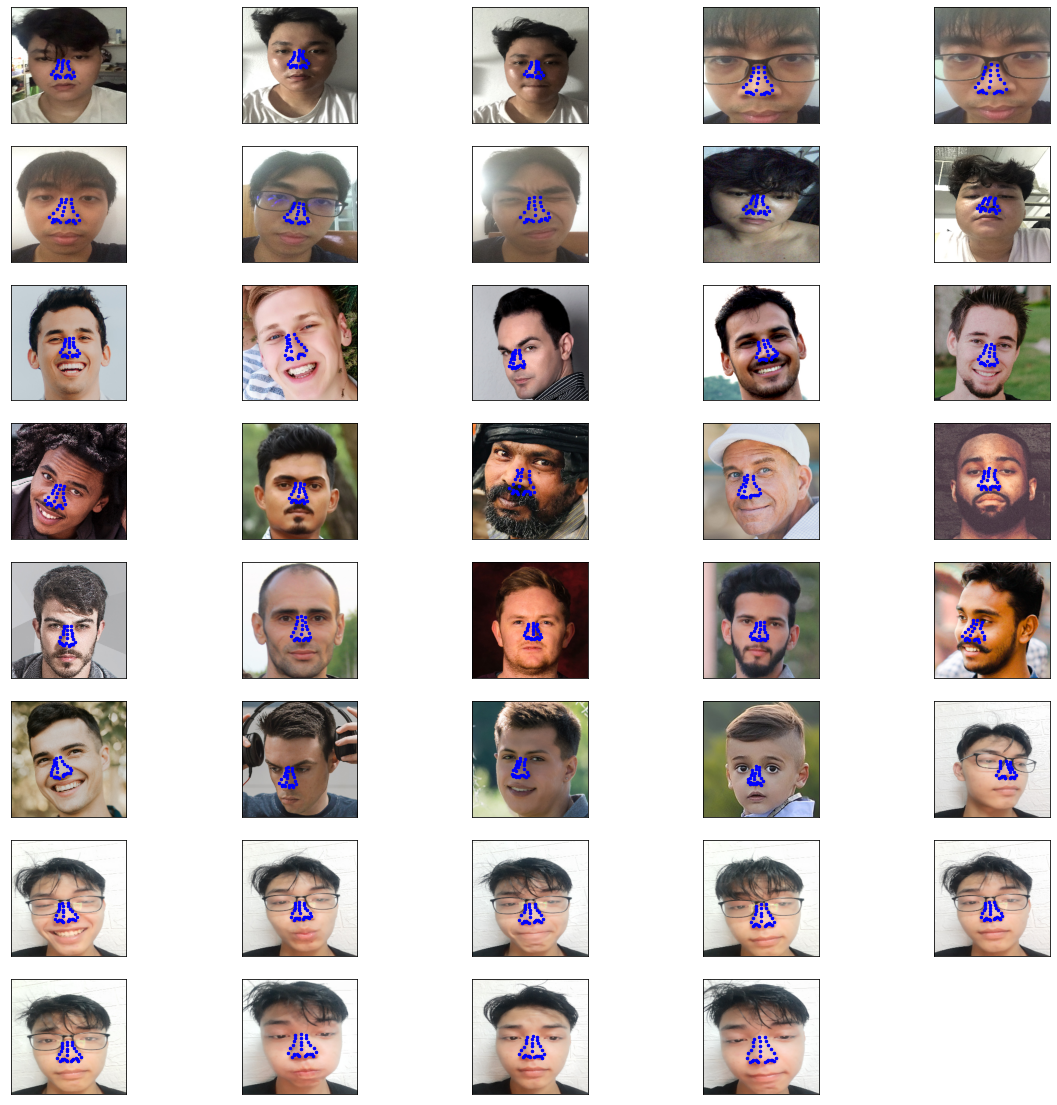

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(datagenerator.filenames)):
    plt.subplot(8,5,i+1)
    img=load_img('drive/MyDrive/Colab Notebooks/data/test_faceID/'+datagenerator.filenames[i],
                 target_size=(240,240))
    plt.imshow(img)
    img=img_to_array(img)
    img=img.reshape(1,240,240,3)
    img=img.astype('float')
    img/=255
    y=model_3.predict(img)
    for i in range(0,58,2):
        plt.plot(y[0][i],
                y[0][i+1],
                'bo',markersize=2.5)
    plt.xticks([])
    plt.yticks([])
plt.show()

#video realtime

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/nose/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/nose/video/Sơn Tùng M-TP - Chắc Ai Đó Sẽ Về - YouTube and 9 more pages - Personal - Microsoft​ Edge 2022-06-23 11-39-46.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

count = 0
# grab the width, height, and fps of the frames in the video stream.
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# initialize the FourCC and a video writer object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output = cv2.VideoWriter('output12.mp4', fourcc, fps, (frame_width, frame_height))
nose_point=np.ones((29,2))
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    count += 1
    print(count)
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(img, 1.1, 4)
    maxx = maxy = maxw = maxh = 0
    for (x, y, w, h) in faces:
        if (w*h > maxw*maxh):
          maxx = x
          maxy = y
          maxw = w
          maxh = h
    cv2.rectangle(img, (maxx, maxy), (maxx+maxw, maxy+maxh), (255, 0, 0), 2)
    maxh = maxw = max(maxh, maxw)
    crop_img = img[maxy:maxy+maxh, maxx:maxx+maxw]

    scale = maxw/240.0
    img=img_to_array(img)
    img=img.reshape(-1,240,240,3)
    img=img.astype('float')
    img/=255
    pred=model_1.predict(img)

    for i in range(0, 58,2):
      pred[0][i]=int(pred[0][i]*scale)+maxx
      pred[0][i+1]=int(pred[0][i+1]*scale)+maxy
    for i in range(29):
      nose_point[i]=[pred[0][2*i],pred[0][2*i+1]]
    nose_point = np.array(nose_point, np.int32)
    nose_point = nose_point.reshape((-1, 1, 2))
    for i in range(29):
      frame = cv2.circle(frame, tuple(nose_point[i][0]), 
                            3, (0,0,255), 2)
    output.write(frame)
  else: 
    break

cap.release()
output.release()